# Predicting the Selling Price of Bulldozers

An ML project to predict sale price of bulldozers.

## Workflow

### 1. Problem Definition 
   > How well can we predict the future sale price of a bulldozer, given it's characteristics and previous examples of how much similar bulldozer's have been sold for?

### 2. Data
The data source has been curated from [`Blue Book for Bulldozers`](https://www.kaggle.com/competitions/bluebook-for-bulldozers/data) of Kaggle'sCompetition Dataset Repository.  

There are three main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

To know more about the evaluation metrics of this project, go to; https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

__Note: The `goal` for most regression evaluation metrics is to `minimize the error`. For example, our goal for this project will be to build a ML model which `minimizes RMSLE`.__

### 4. Features
Kaggle provides a data dictionary detailing all of the features of tha dataset. You can view it on Google Sheets. [Data Dictionary](https://docs.google.com/spreadsheets/d/1HP4InhjaHwYIPWZwZ9vcJJdKnqKAXEDcSFz6MwYqaL4/edit?usp=sharing)

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import training and validation sets
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory = False, )

In [3]:
data_len, feature_len = df.shape
feature_list = df.columns
print(f'Len: {data_len},\n Column:{feature_len}')
# print(feature_list)

Len: 412698,
 Column:53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.saledate[:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

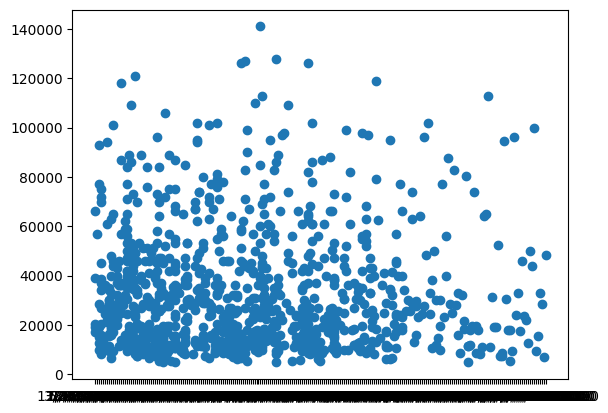

In [7]:
# sns.lineplot(df.sample(data_len*1//500), x = 'saledate', y = 'SalePrice', alpha = 0.6)
# sns.lineplot(df.sample(data_len*1//1000), x = 'saledate', y = 'SalePrice')
# sns.lineplot(df.sample(data_len*1//1000), x = 'saledate', y = 'SalePrice')
# sns.lineplot(df.sample(data_len*1//1000), x = 'saledate', y = 'SalePrice')

fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

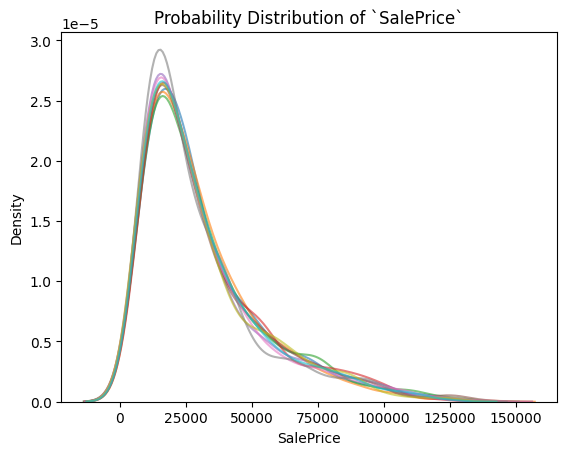

In [8]:
for i in range(10):
    sns.kdeplot(data = df.sample(data_len*1//500), x = 'SalePrice', alpha = 0.6)
plt.title("Probability Distribution of `SalePrice`");

## Data Cleaning

### Parsing Dates

when we work with time-series, we are supposed to enrich the date and time component as much as possible.

To do the aforementioned, we need to use `parse_dates` parameter in `Pandas`.

In [9]:
# importing data again with `parse_dates`
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory = False, 
                parse_dates=['saledate'])

In [10]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

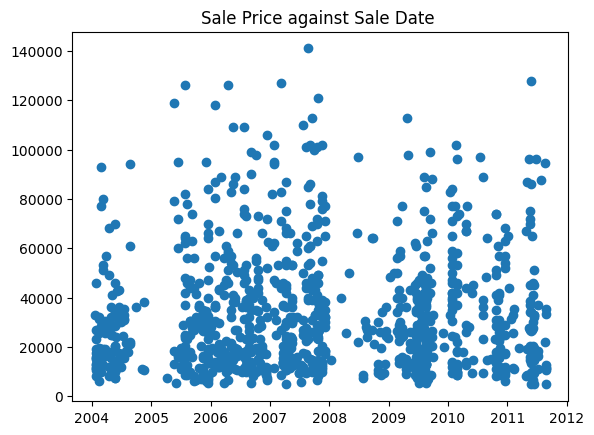

In [11]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);
plt.title('Sale Price against Sale Date ');

### Sorting DataFrame by `saledate`

In [12]:
df.sort_values(by=['saledate'], inplace = True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original data

In [13]:
df_temp = df.copy()
df_temp.head(10).T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356
datasource,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


## Feature Engineering

In [14]:
# Enriching the DataFrame with date-time features
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

# Dropping saledate
df_temp.drop("saledate", axis = 1, inplace = True)

In [15]:
# check the values of different states
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modelling

We have done some basic EDA.
Now let's go for some model driven EDA. ;)

### Convert strings to categoricals

One way we can turn all of our data into numbers is by converting them into pandas categories.

Ref:
1. https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html
2. https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html

In [16]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_jobs = -1, random_state = 42)

# model.fit(df_temp.drop("SalePrice", axis = 1), df_temp['SalePrice'])

In [17]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [18]:
pd.api.types.is_object_dtype(df_temp.UsageBand)

True

In [19]:
df_temp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [20]:
# Find out the string values
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content): # String or Object?
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [21]:
# df_temp.state.cat.codes
# Turning string values into categorical values
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [22]:
# df_temp.state.cat.codes
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [23]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [24]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [25]:
df_temp.isna().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [26]:
df_temp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", 
              index = False)

### Load preprocessed data

In [27]:
# Improt preprocessed data
df_temp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
              low_memory = False, parse_dates= True)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill Missing Values

In [28]:
# Check of numeric columns
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [29]:
# check for numeric columns with null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).any():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [30]:
# Fill numeric rows with median # series stored with name-head = Label
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            # Add a binary column which tells us if the data was missing
            df_temp[label+"_is_missing"] = pd.isna(content)
            # FIll missing numeric values with median
            df_temp[label] = content.fillna(content.median())       

In [31]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [32]:
# check for categorical columns with null values
# cat_cols = []
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        if pd.isna(content).any():
#             cat_cols.append(label)
            print(label)
#             count+=1
# count


UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
pd.Categorical(df_temp['Steering_Controls']).codes

array([-1,  1, -1, ..., -1, -1,  1], dtype=int8)

In [34]:
# Turn categorical variables into numbers
for label, content in df_temp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_temp[label] = pd.Categorical(content).codes+1        

In [35]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [36]:
# Don't know why this feature didn't encode
# df_temp.fiModelDesc = pd.Categorical(df_temp.fiModelDesc).codes+1
# df_temp.fiBaseModel = pd.Categorical(df_temp.fiBaseModel).codes+1
# df_temp['fiBaseModel'] = pd.Categorical(df_temp['fiBaseModel']).codes+1
# df_temp['fiBaseModel']

 As we have completed encoding and imputation, we should be able to build a ML model

In [37]:
# %%time

# # Instantiate Model
# model = RandomForestRegressor(n_jobs = -1, random_state = 42)

# # Fit the model
# model.fit(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

# Too long
# CPU times: total: 54min 25s
# Wall time: 19min 18s

In [38]:
# Data Leakage! hehe xD

# %time model.score(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

# CPU times: total: 39.7 s
# Wall time: 21.8 s
# 0.9875468079970562


# Splitting data into train/validation sets

In [42]:
# SPlit data into training and validation
df_valid = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]
len(df_valid), len(df_train)

(11573, 401125)

In [43]:
X_train, y_train =  df_train.drop("SalePrice", axis = 1), df_train.SalePrice
X_valid, y_valid =  df_valid.drop("SalePrice", axis = 1), df_valid.SalePrice
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building an Evaluation Function (Competition uses RMSLE)

In [44]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates RMSLE between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create funtion to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [45]:
%%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42,
                             max_samples = 10000)
model.fit(X_train, y_train)

CPU times: total: 2min 8s
Wall time: 42.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [46]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Hyperparameter tuning with RandomizedSearchCV

In [48]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=10,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
CPU times: total: 45.7 s
Wall time: 2min 28s


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [49]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [50]:
show_scores(rs_model)

{'Training MAE': 6224.564126790852,
 'Valid MAE': 7555.260933137387,
 'Training RMSLE': 0.2816148392338642,
 'Valid RMSLE': 0.3054485234612445,
 'Training R^2': 0.827436215943709,
 'Valid R^2': 0.8134696893335295}

## Train a model with best hyperparameters

**Note:** Found after hundred iterations of `RandomizedSearchCV`

In [51]:
%%time

# most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None)

# fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 7min 47s
Wall time: 2min 50s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [52]:
show_scores(ideal_model)

{'Training MAE': 2955.5411479496347,
 'Valid MAE': 5924.63824855955,
 'Training RMSLE': 0.14461221697400273,
 'Valid RMSLE': 0.24543299353710674,
 'Training R^2': 0.9589216744600506,
 'Valid R^2': 0.8833094510042544}

In [53]:
show_scores(rs_model)

{'Training MAE': 6224.564126790852,
 'Valid MAE': 7555.260933137387,
 'Training RMSLE': 0.2816148392338642,
 'Valid RMSLE': 0.3054485234612445,
 'Training R^2': 0.827436215943709,
 'Valid R^2': 0.8134696893335295}

## Make Predictions on the Data

In [74]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [75]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        else:
        # Filled categorical missing data and turn categories into numbers
#         if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [76]:
df_test = preprocess_data(df_test)
# df_test.head()

In [77]:
df_test = df_test[X_train.columns]
auctioneerID_is_missing

KeyError: "['auctioneerID_is_missing'] not in index"

In [78]:
df_test['auctioneerID_is_missing'] = False
df_test = df_test[X_train.columns]


In [79]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

In [ ]:
# # SolveD already

# # # Setting up 'auctioneerID_is_missing' column
# # df_test['auctioneerID_is_missing'] = False

In [ ]:
# The Fix has been done already
# # # set(X_train.columns) - set(df_test.columns)

# # # Make predictions on the test dataset using the best model
# # test_preds = ideal_model.predict(df_test)

In [80]:
# Format predictions into the same format kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,16621.349591
1,1227844,15601.601998
2,1227847,51752.931116
3,1227848,69745.723463
4,1227863,59907.200678
...,...,...
12452,6643171,38139.329442
12453,6643173,11358.678901
12454,6643184,13267.971839
12455,6643186,16879.609280


In [83]:
# Export prediction data
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature Importance

In [85]:
# Find feature importance of our best model
len(ideal_model.feature_importances_)

102

In [133]:
# Helpter function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

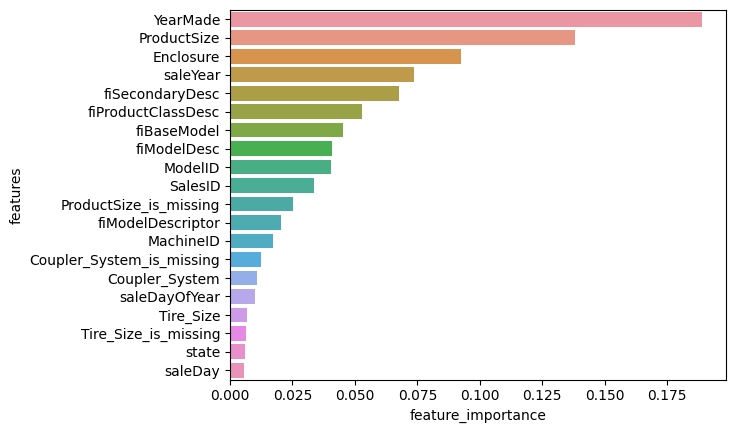

In [134]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [98]:
ideal_model.feature_importances_

array([3.34331462e-02, 1.70209586e-02, 4.04234583e-02, 1.76834088e-03,
       3.29800966e-03, 1.89091122e-01, 3.01833575e-03, 9.93580544e-04,
       4.07268320e-02, 4.52206183e-02, 6.76073388e-02, 5.02662588e-03,
       2.05014971e-02, 1.38134517e-01, 5.29441747e-02, 6.02616243e-03,
       4.12713583e-03, 3.75083515e-03, 4.03561071e-03, 9.23406878e-02,
       5.15766003e-04, 9.55705862e-05, 1.01299751e-03, 5.08324540e-04,
       1.36881935e-03, 2.10292148e-05, 9.53447330e-05, 5.44963484e-03,
       1.06489239e-03, 8.14507906e-05, 3.76873661e-03, 4.44800220e-03,
       5.57137778e-03, 7.88324528e-04, 3.37154676e-04, 6.74437130e-03,
       7.90778171e-04, 1.09511140e-02, 1.04345161e-03, 2.46742790e-03,
       1.62024186e-03, 1.04444347e-03, 8.78236095e-04, 5.60266961e-04,
       7.47913684e-04, 3.28622098e-04, 5.28206606e-04, 2.85284559e-03,
       7.74068701e-04, 2.03690677e-04, 2.36200765e-04, 7.37263850e-02,
       3.84152810e-03, 5.66549167e-03, 2.90910134e-03, 9.84248036e-03,
      